In [1]:
import os
import pandas as pd

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from keras.layers import *
from keras.models import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns; sns.set(font_scale=1.2)
from sklearn import svm


C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# reading tsv file
train_data = pd.read_csv('C:\\Users\\User\\Desktop\\pos_neg_data\\all\\train.tsv',sep = "\t" ,index_col = False)

In [3]:
train_data.head(20)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [4]:
#np.random.shuffle(train_data.values)
train_data.reindex(np.random.permutation(train_data.index))

,PhraseId,SentenceId,Phrase,Sentiment
53257,53258,2643,Crazy as Hell,2
46606,46607,2268,are lulls,2
105840,105841,5586,love Safe Conduct -LRB- Laissez Passer -RRB- f...,3
54010,54011,2683,three stories,2
117856,117857,6294,A heroic tale of persistence that is sure to w...,4
7510,7511,304,into a gorgeously atmospheric meditation on li...,3
109525,109526,5801,artistic merits,3
133679,133680,7211,muscles and,2
72613,72614,3708,delusional,1
13623,13624,584,"older and wiser eyes ,",3


In [5]:
# Pre-processing

In [6]:
train_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [7]:
# Making everything in lowercase

train_data['Phrase'] = train_data['Phrase'].str.lower()

# Replacing and removig shit

train_data = train_data.replace('[^A-Za-z0-9(),!?\'\`]', ' ', regex=True)
train_data = train_data.replace("\'s", "\'s", regex=True)
train_data = train_data.replace("\'ve", " \'ve", regex=True)
train_data = train_data.replace("n\'t", " n\'t", regex=True)
train_data = train_data.replace("\'re", " \'re", regex=True)
train_data = train_data.replace("\'d", " \'d", regex=True)
train_data = train_data.replace("\'ll", " \'ll", regex=True)
train_data = train_data.replace(",", " , ", regex=True)
train_data = train_data.replace("!", " ! ", regex=True)
train_data = train_data.replace("\(", " \( ", regex=True)
train_data = train_data.replace("\)", " \) ", regex=True)
train_data = train_data.replace("\?", " \? ", regex=True)
train_data = train_data.replace("\s{2,}", " ", regex=True)


In [8]:
train_data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [9]:
train_data.head(10)
train_data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [10]:
train_data.count()

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64

In [11]:
len(train_data)

156060

In [12]:
x = train_data.Phrase
y = train_data.Sentiment

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [13]:
x_train.count()

124848

In [14]:
x_test.count()

31212

In [15]:
y_train.count()

124848

In [16]:
y_test.count()

31212

Text(0.5,1,'Data Distribution')

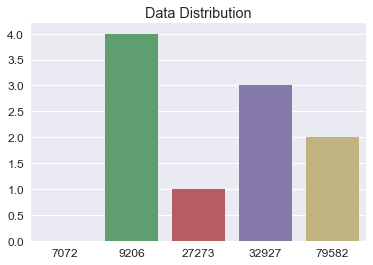

In [17]:
s = train_data['Sentiment'].value_counts()
sns.barplot(x=s.values, y=s.index)
plt.title('Data Distribution')

In [18]:
# vectorizing 

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)


In [19]:
# Naive base

NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.6087402281173907

In [20]:
# Random Forest

rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.5114699474561066

In [23]:
# MLP nn sklearn

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(x_train_dtm, y_train)
print("Training set score: %f" % mlp.score(x_train_dtm, y_train))
print("Test set score: %f" % mlp.score(x_train_dtm, y_train))
mlp.classes_
pred = mlp.predict(x_test_dtm)
metrics.accuracy_score(y_test,pred)


Iteration 1, loss = 1.13224023
Iteration 2, loss = 0.90345933
Iteration 3, loss = 0.81985566
Iteration 4, loss = 0.76813730
Iteration 5, loss = 0.73291037
Iteration 6, loss = 0.70515754
Iteration 7, loss = 0.68081986
Iteration 8, loss = 0.66119322
Iteration 9, loss = 0.64299510
Iteration 10, loss = 0.62844610
Iteration 11, loss = 0.61452858
Iteration 12, loss = 0.60310184
Iteration 13, loss = 0.59126902
Iteration 14, loss = 0.57954992
Iteration 15, loss = 0.57284539
Iteration 16, loss = 0.56077659
Iteration 17, loss = 0.55361834
Iteration 18, loss = 0.54462860
Iteration 19, loss = 0.53738531
Iteration 20, loss = 0.53003948
Iteration 21, loss = 0.52394771
Iteration 22, loss = 0.51802947
Iteration 23, loss = 0.51081271
Iteration 24, loss = 0.50585920
Iteration 25, loss = 0.49989253
Iteration 26, loss = 0.49517265
Iteration 27, loss = 0.48944823
Iteration 28, loss = 0.48494848
Iteration 29, loss = 0.47941253
Iteration 30, loss = 0.47446256
Iteration 31, loss = 0.47075058
Iteration 32, los

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6339869281045751

In [35]:
nb_accur = metrics.accuracy_score(y_test,y_predict)
rf_accur =  metrics.accuracy_score(y_test,rf_predict)
mlp_accur = metrics.accuracy_score(y_test,pred)



In [41]:
# accu = pd.DataFrame([{"Naive base" : nb_accur, "Random Forest" : rf_accur, "MLP" : mlp_accur}])
accu = pd.DataFrame({"algo" : ["Naive base","Random Forest","MLP"],"accuracy" : [nb_accur,rf_accur,mlp_accur]})
accu


,algo,accuracy
0,Naive base,0.608740
1,Random Forest,0.511470
2,MLP,0.633987


Text(0.5,1,'Data Distribution')

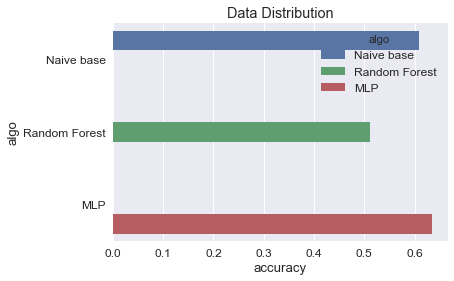

In [57]:
sns.barplot(x=accu.accuracy, y=accu.algo,  hue="algo", data=accu)
plt.title('Data Distribution')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


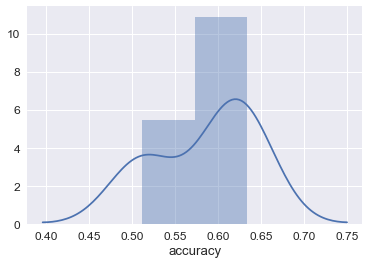

In [59]:
sns.distplot(accu.accuracy, label= "accuracy")

In [39]:
s

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
# Fit the SVM model

# model_ = svm.SVC(kernel='linear')
# model_.fit(x_train_dtm,y_train)
# svmPredict = model_.predict(x_test_dtm)
# metrics.accuracy_score(y_test,svmPredict)